In [76]:
# Parameters
param_dict = {
  "cave": {
    "start_range": 0.4,
    "end_range": 10,
    "number_of_shape_countours_threshold": 150,
    "center_x_adjustment": 0,
    "center_y_adjustement": -3,
    "ellipse_x_adjustment": -35,
    "ellipse_y_adjustment": -35,
    "start_gauge_angle": 217,
    "end_gauge_angle": -45,
    "threshold_value": 90,
    "threshold_brightness": 255,
    "minLineLength": 40,
    "maxLineGap": 1
  },
  "water": {
    "start_range": 100,
    "end_range": 900,
    "number_of_shape_countours_threshold": 200,
    "center_x_adjustment": 0,
    "center_y_adjustement": 80,
    "ellipse_x_adjustment": -80,
    "ellipse_y_adjustment": 0,
    "start_gauge_angle": 147,
    "end_gauge_angle": 42,
    "threshold_value": 170,
    "threshold_brightness": 255,
    "minLineLength": 40,
    "maxLineGap": 1
  },
  "gauge_1": {
    "start_range": 0,
    "end_range": 1000,
    "number_of_shape_countours_threshold": 150,
    "center_x_adjustment": 0,
    "center_y_adjustement": -3,
    "ellipse_x_adjustment": -35,
    "ellipse_y_adjustment": -35,
    "start_gauge_angle": 224.5,
    "end_gauge_angle": -44.5,
    "threshold_value": 90,
    "threshold_brightness": 255,
    "minLineLength": 40,
    "maxLineGap": 1
  }
}

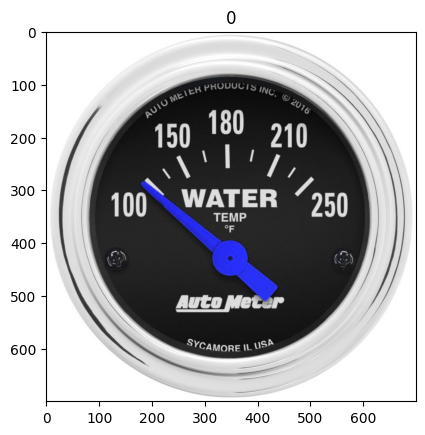

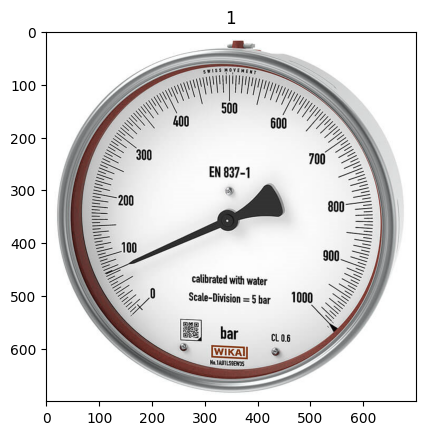

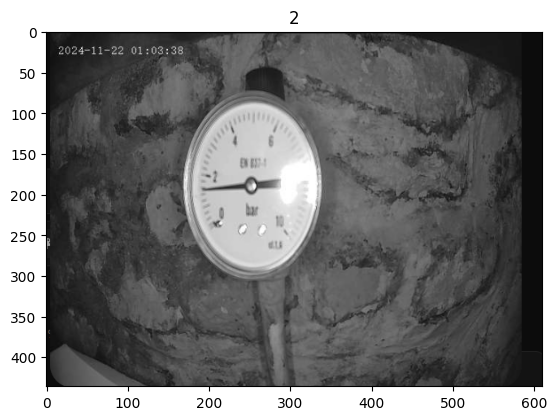

Type: water
Params: {'start_range': 100, 'end_range': 900, 'number_of_shape_countours_threshold': 200, 'center_x_adjustment': 0, 'center_y_adjustement': 80, 'ellipse_x_adjustment': -80, 'ellipse_y_adjustment': 0, 'start_gauge_angle': 147, 'end_gauge_angle': 42, 'threshold_value': 170, 'threshold_brightness': 255, 'minLineLength': 40, 'maxLineGap': 1}
Type: gauge_1
Params: {'start_range': 0, 'end_range': 1000, 'number_of_shape_countours_threshold': 150, 'center_x_adjustment': 0, 'center_y_adjustement': -3, 'ellipse_x_adjustment': -35, 'ellipse_y_adjustment': -35, 'start_gauge_angle': 224.5, 'end_gauge_angle': -44.5, 'threshold_value': 90, 'threshold_brightness': 255, 'minLineLength': 40, 'maxLineGap': 1}
Type: cave
Params: {'start_range': 0.4, 'end_range': 10, 'number_of_shape_countours_threshold': 150, 'center_x_adjustment': 0, 'center_y_adjustement': -3, 'ellipse_x_adjustment': -35, 'ellipse_y_adjustment': -35, 'start_gauge_angle': 217, 'end_gauge_angle': -45, 'threshold_value': 90, '

In [77]:
from matplotlib import pyplot as plt
import cv2
import glob
import re

# List all images with name image{X}.png
image_files = glob.glob('image_*_main.*')

# Load all images using cv2
images = [cv2.imread(image_file) for image_file in image_files]

# Extract the type part from the file name
type_pattern = re.compile(r'image_(.*?)_main\..*')
types = [type_pattern.search(file).group(1) for file in image_files]

for i in range(len(images)):
  plt.imshow(images[i])
  plt.title(i)
  plt.show()

for i in range(len(images)):
  print("Type:", types[i])
  print("Params:", param_dict.get(types[i], None))


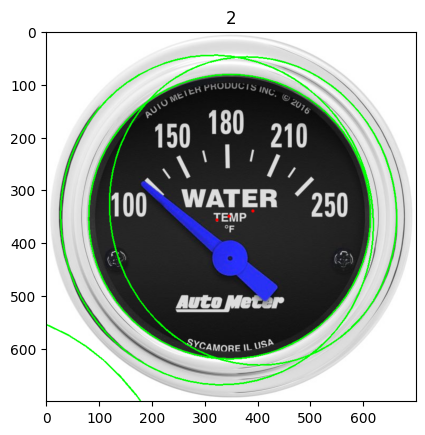

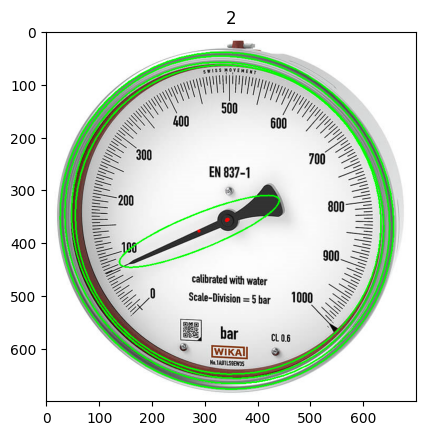

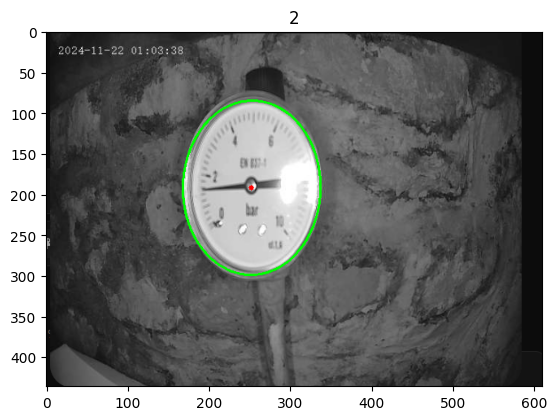

In [78]:
import numpy as np

from lib.helpers import find_ellipses

ellipses = []
for a in range(len(images)):
  image = images[a]
  params = param_dict.get(types[a], None)
  ellipses.append(find_ellipses(image, params.get("number_of_shape_countours_threshold")))

  ellipse_image = image.copy()

  for ellipse in ellipses[a]:
    # Draw the ellipse
    cv2.ellipse(ellipse_image, ellipse, (0, 255, 0), 2)

    # Draw the center of the ellipse
    center = (int(ellipse[0][0]), int(ellipse[0][1]))
    cv2.circle(ellipse_image, center, 3, (255, 0, 0), -1)

  # Display the output image with ellipses drawn
  plt.imshow(ellipse_image)
  plt.title(i)
  plt.show()


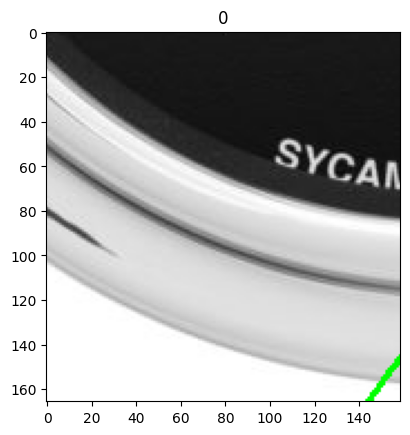

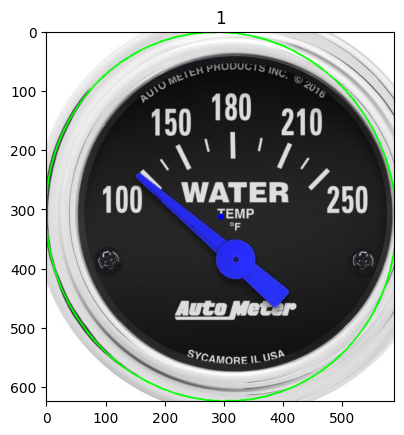

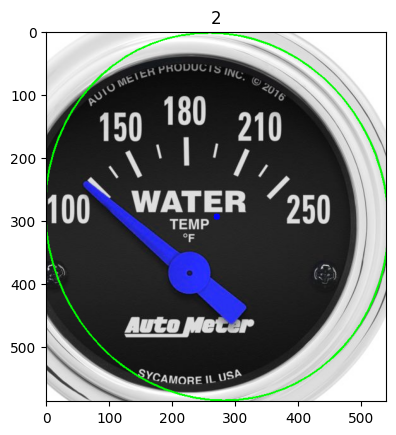

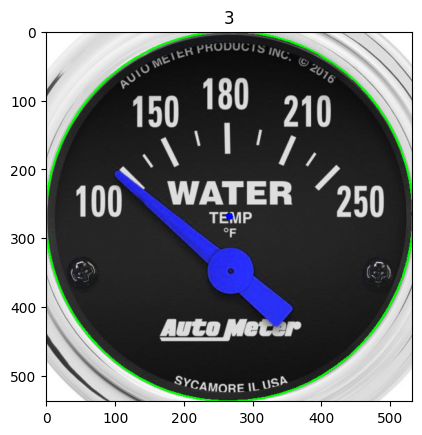

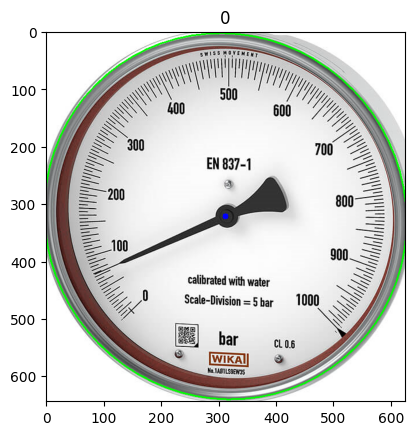

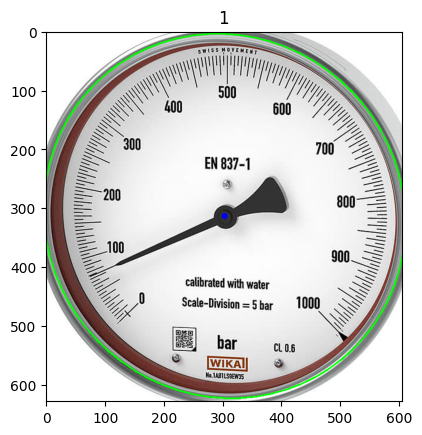

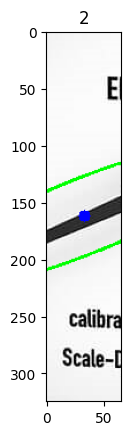

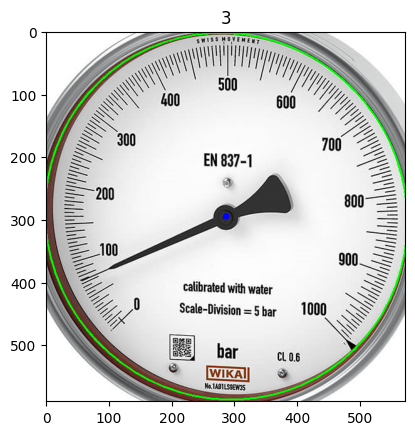

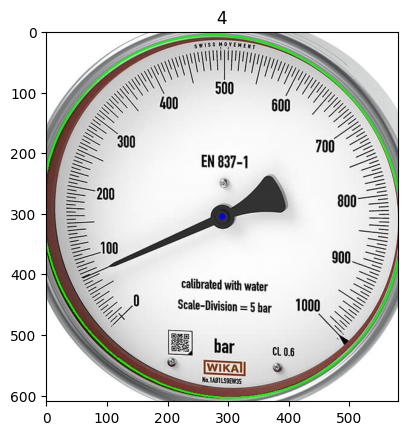

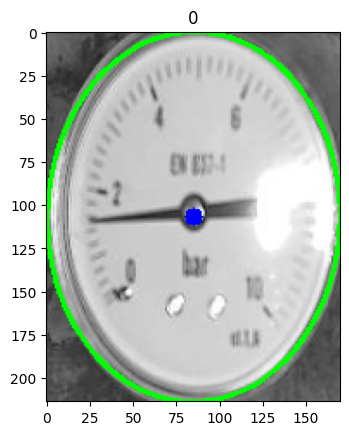

In [79]:
cropped_images = []
cropped_params = []

import lib.helpers as helpers


new_ellipses = []
for a in range(len(images)):
  cropped_images.append([])
  cropped_params.append([])
  new_ellipses.append([])

  for i in range(len(ellipses[a])):
    ellipse = ellipses[a][i]
    cropped_image, new_ellipse, crop_params = helpers.crop_image_to_ellipsis(ellipse, images[a])

    cropped_images[a].append(cropped_image)
    cropped_params[a].append(crop_params)
    new_ellipses[a].append(new_ellipse)

    # Create a copy of the cropped image to draw the new ellipse on
    cropped_image_with_ellipse = cropped_image.copy()

    # Draw the new ellipse
    cv2.ellipse(cropped_image_with_ellipse, new_ellipse, (0, 255, 0), 2)

    # Draw the center of the new ellipse
    cv2.circle(cropped_image_with_ellipse, (int(new_ellipse[0][0]), int(new_ellipse[0][1])), 5, (0, 0, 255), -1)

    # Display the cropped image with the new ellipse and center
    plt.imshow(cropped_image_with_ellipse)
    plt.title(i)
    plt.show()

ellipses = new_ellipses

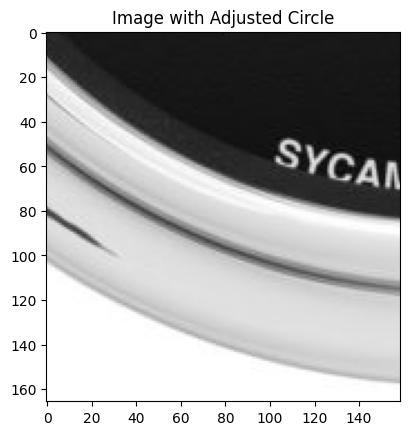

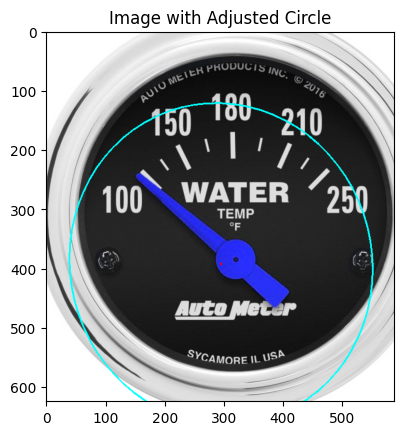

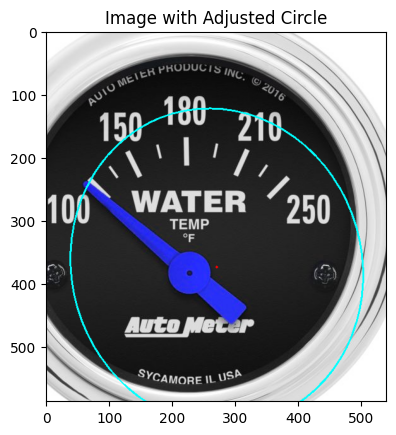

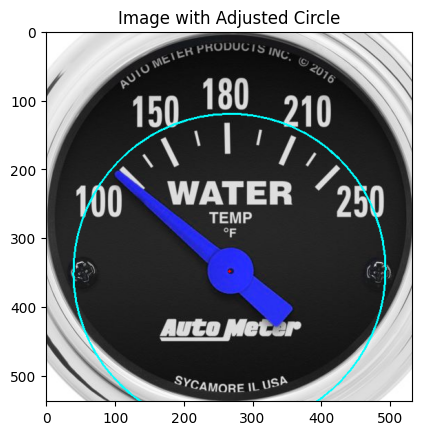

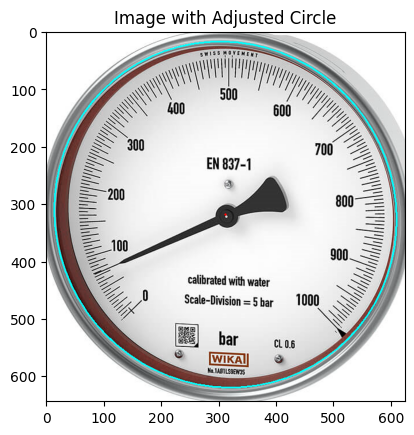

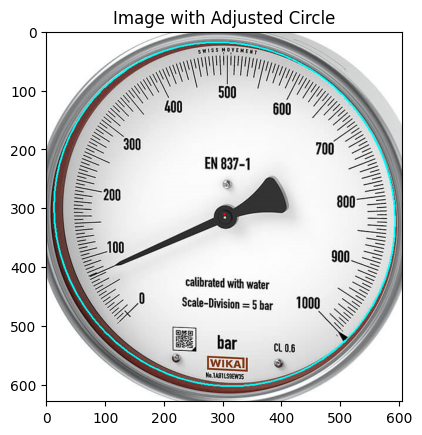

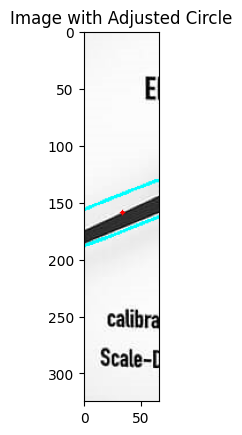

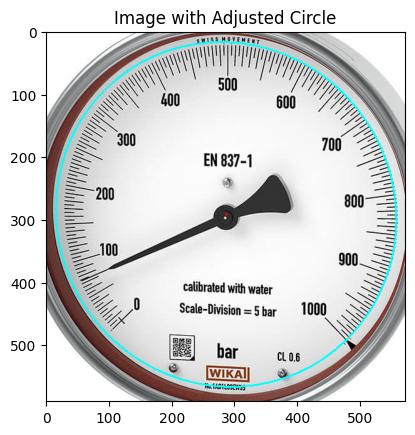

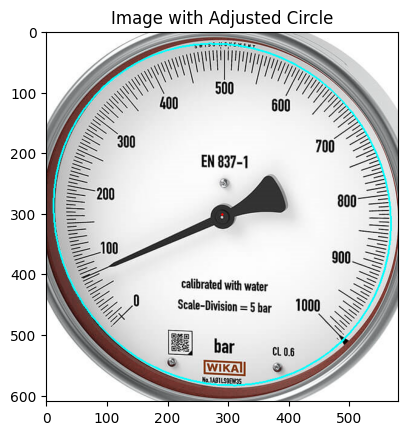

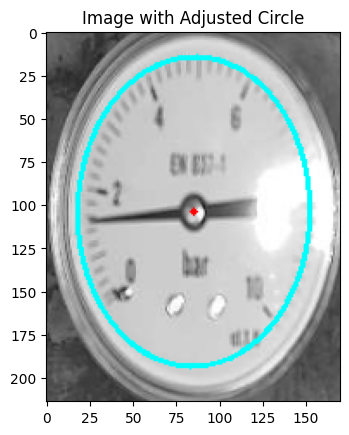

In [80]:
# Adjust the radius
for a in range(len(images)):
  params = param_dict.get(types[a], None)
  
  for i in range(len(ellipses[a])):
    ellipse = ellipses[a][i]
    x, y = ellipse[0]
    adjusted_center = (int(x + params.get("center_x_adjustment")), int(y + params.get("center_y_adjustement")))
    adjusted_ellipsis = (adjusted_center, (ellipse[1][0] + params.get("ellipse_x_adjustment"), ellipse[1][1] + params.get("ellipse_x_adjustment")), ellipse[2])

    ellipses[a][i] = adjusted_ellipsis

    # Create a copy of the original image to draw the adjusted circle on
    adjusted_circle_image = cropped_images[a][i].copy()

    # Draw the center of the adjusted circle
    cv2.circle(adjusted_circle_image, adjusted_center, 2, (255, 0, 0), -1)

    # Draw the ellipse using the adjusted radius and center
    cv2.ellipse(adjusted_circle_image, adjusted_ellipsis, (0, 255, 255), 2)

    # Display the image with the adjusted circle
    plt.imshow(adjusted_circle_image)
    plt.title('Image with Adjusted Circle')
    plt.show()


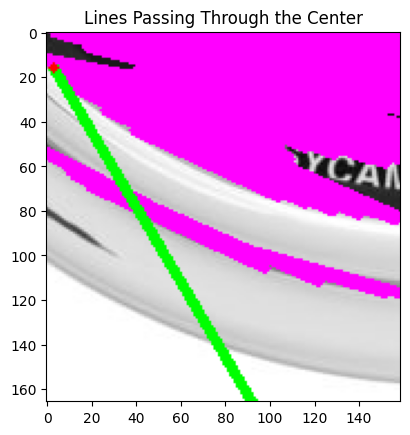

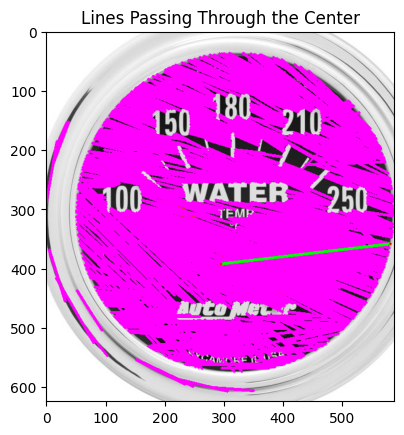

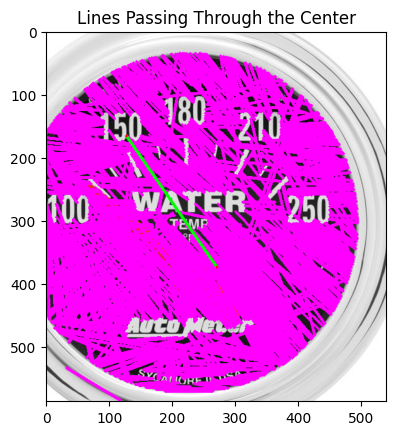

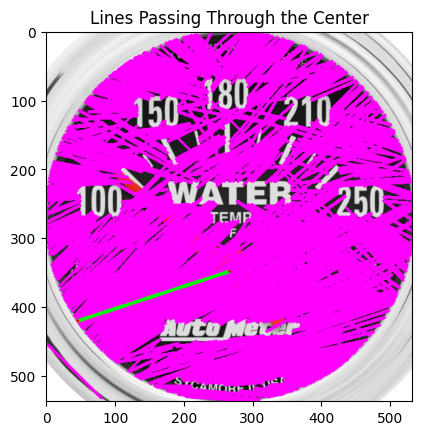

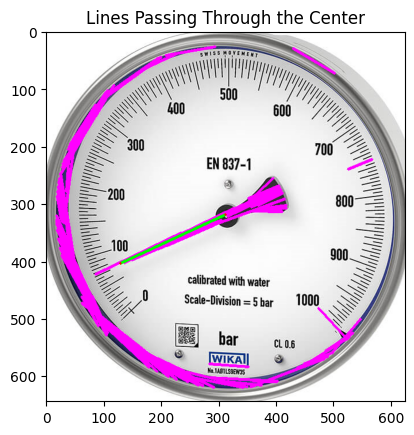

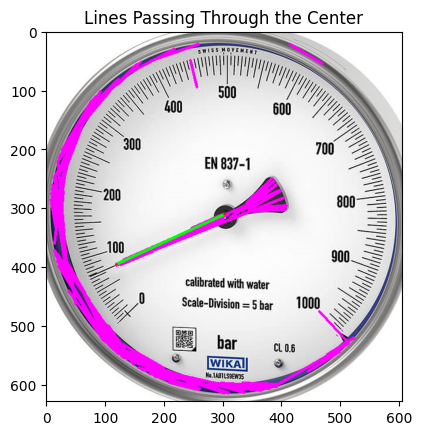

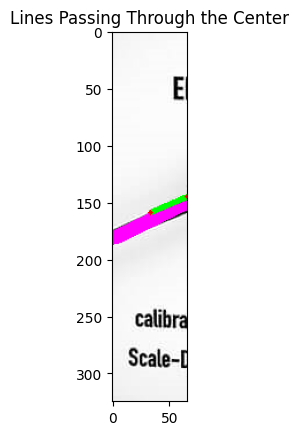

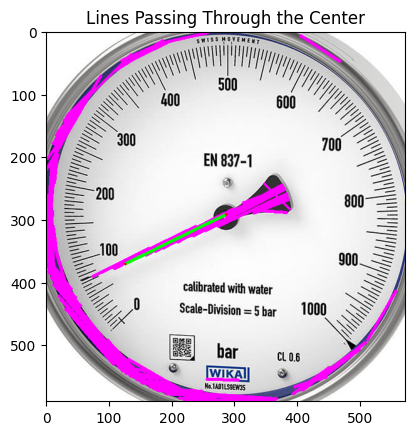

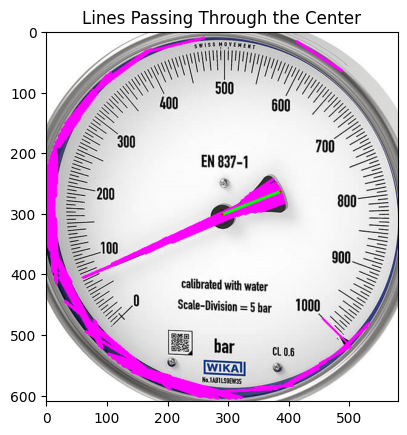

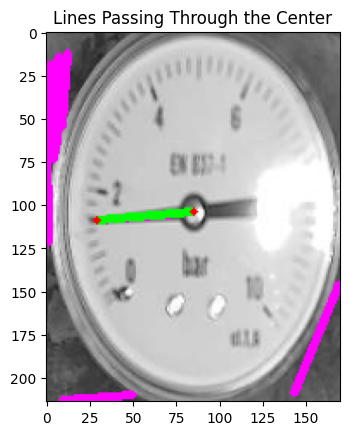

In [81]:

import lib.helpers as helpers

needle_points = []
for a in range(len(images)):
  params = param_dict.get(types[a], None)
  needle_points.append([])
  for i in range(len(ellipses[a])):
    ellipse = ellipses[a][i]
    needle_point, filtered_lines, all = helpers.find_needle(cropped_images[a][i], ellipse, params.get("threshold_value"), params.get("threshold_brightness"), params.get("minLineLength"), params.get("maxLineGap"))

    if needle_point is None:
      needle_points[a].append(None)
      print('No needle found')
      continue

    needle_points[a].append(needle_point)

    render_needle = cropped_images[a][i].copy()

    # Draw all the filtered lines on the ROI
    for line in all:
      x1, y1, x2, y2 = line[0]
      cv2.line(render_needle, (x1, y1), (x2, y2), (128, 0, 0), 1)

    # Draw all the filtered lines on the ROI
    for line in filtered_lines:
      x1, y1, x2, y2 = line[0]
      cv2.line(render_needle, (x1, y1), (x2, y2), (255, 0, 255), 3)

    # Draw the lines on the ROI
    cv2.line(render_needle, needle_point, ellipses[a][i][0], (0, 255, 0), 3)

    # Draw the furthest point on the ROI
    cv2.circle(render_needle, needle_point, 2, (0, 0, 255), -1)

    # Draw the center of the ROI
    cv2.circle(render_needle, ellipses[a][i][0], 2, (0, 0, 255), -1)

    # Display the image with lines
    plt.imshow(cv2.cvtColor(render_needle, cv2.COLOR_BGR2RGB))
    plt.title('Lines Passing Through the Center')
    plt.show()

Files matching pattern 'image_water_*': ['image_water_main.jpg']
Value 221.35807558132976


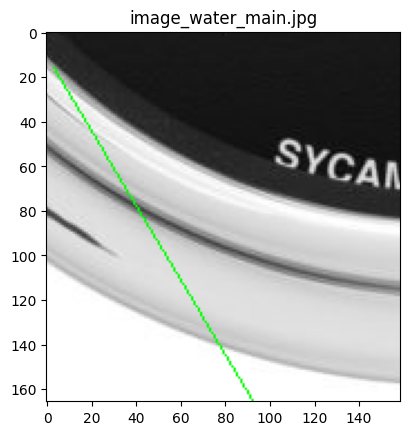

Value 427.2661948633716


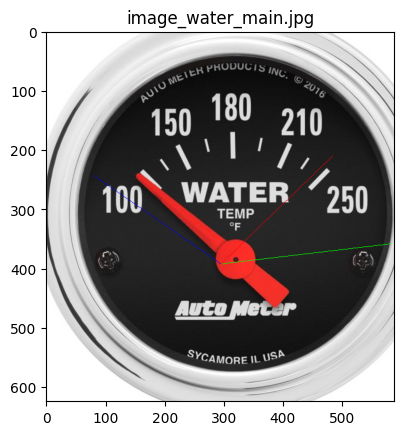

Value 159.55248810846712


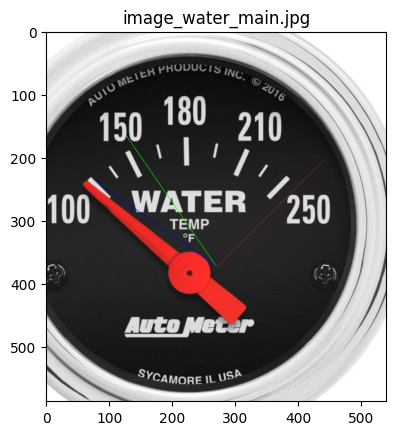

Value 248.66450549593685


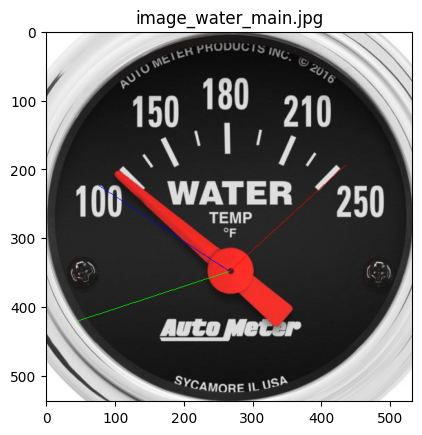

Files matching pattern 'image_gauge_1_*': ['image_gauge_1_main.png']
Value 89.65292238583149


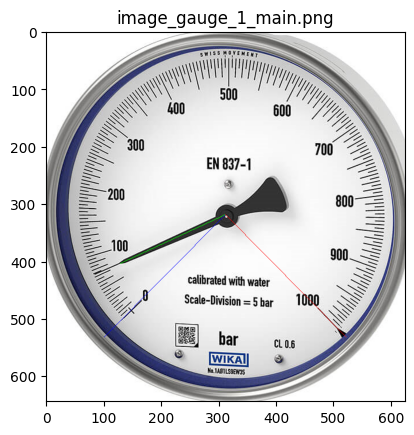

Value 87.60049709523585


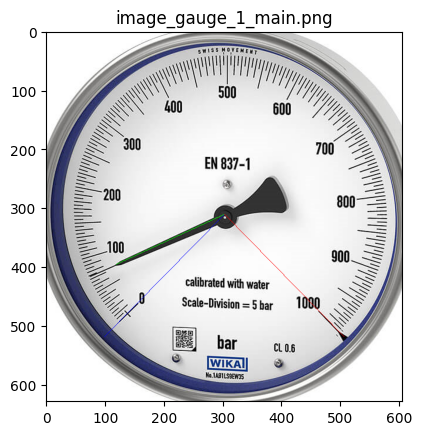

Value 195.83253579618042


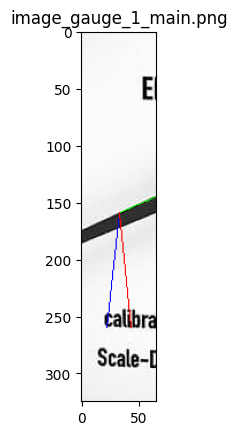

Value 89.27432246713418


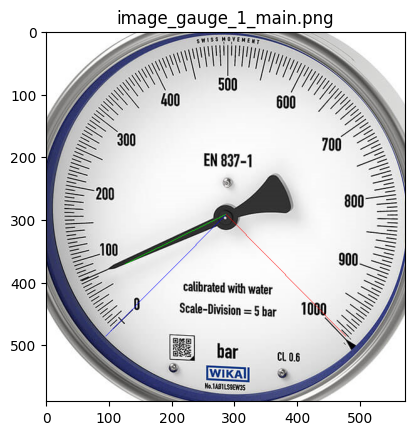

Value 274.97889509803315


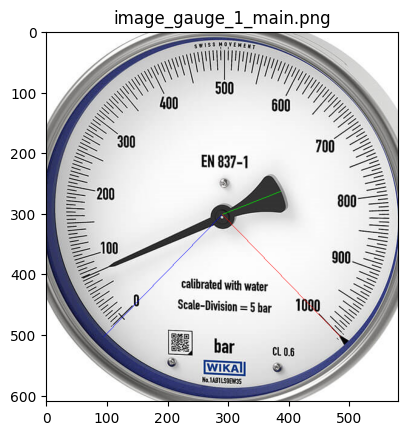

Files matching pattern 'image_cave_*': ['image_cave_1.png', 'image_cave_main.png']
Value 1.669678109542314


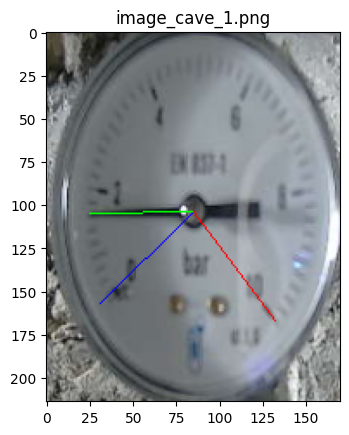

Value 1.5652959923273997


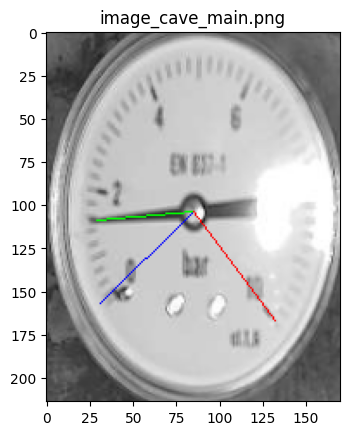

In [82]:
# Look for files matching the pattern "image_{type}_{x}.png"
for a in range(len(images)):
  pattern = f'image_{types[a]}_*'
  matching_files = glob.glob(pattern)
  params = param_dict.get(types[a], None)
  
  print(f"Files matching pattern '{pattern}': {matching_files}")

  # Load each matching image using cv2
  for file in matching_files:
    image = cv2.imread(file)

    for i in range(len(ellipses[a])):
      ellipse = ellipses[a][i]
      (top_left_x, top_left_y, bottom_right_x, bottom_right_y) = cropped_params[a][i]

      cropped = image[top_left_y:bottom_right_y, top_left_x:bottom_right_x].copy()

      needle, filtered, all = helpers.find_needle(cropped, ellipses[a][i], params.get("threshold_value"), params.get("threshold_brightness"), params.get("minLineLength"), params.get("maxLineGap"))

      # # Draw all the filtered lines on the ROI
      # for line in all:
      #   x1, y1, x2, y2 = line[0]
      #   cv2.line(cropped, (x1, y1), (x2, y2), (128, 0, 0), 1)

      # # Draw all the filtered lines on the ROI
      # for line in filtered_lines:
      #   x1, y1, x2, y2 = line[0]
      #   cv2.line(cropped, (x1, y1), (x2, y2), (255, 255, 255), 1)

      if not needle is None:
        gauge_value = helpers.calculate_gauge_value(ellipse, needle, params.get("start_gauge_angle"), params.get("end_gauge_angle"), params.get("start_range"), params.get("end_range"))

        print("Value", gauge_value)

        # Draw the needle on the cropped image
        cv2.line(cropped, needle, ellipse[0], (0, 255, 0), 1)
      else:
        print("No needle found")

      center = ellipse[0]

      radius_x = ellipse[1][0] / 2
      radius_y = ellipse[1][1] / 2
      start_angle_rad = np.deg2rad(params.get("start_gauge_angle"))
      end_angle_rad = np.deg2rad(params.get("end_gauge_angle"))

      start_point = (int(center[0] + radius_x * np.cos(start_angle_rad) ),
              int(center[1] - radius_y * np.sin(start_angle_rad)))
      end_point = (int(center[0] + radius_x * np.cos(end_angle_rad)),
            int(center[1] - radius_y * np.sin(end_angle_rad)))

       # Draw the start gauge limit
      cv2.line(cropped, center, start_point, (255, 0, 0), 1)

      # Draw the end gauge limit
      cv2.line(cropped, center, end_point, (0, 0, 255), 1)

      plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
      plt.title(file)
      plt.show()

